# Explore here

In [1]:
# - Importe De Librerías:

import pandas as pd

# - Lectura De Datos:

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

# - Visualización Del DataFrame:

df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [5]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [7]:
# - Conversión De Columna:

df['date'] = pd.to_datetime(df['date'])

# - Establecer Índice Como Fecha:

df.index = df['date'].dt.date

# - Eliminación De Columna 'date':

df.drop('date', axis=1, inplace=True)

# - Visualización Del DataFrame:

df


,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


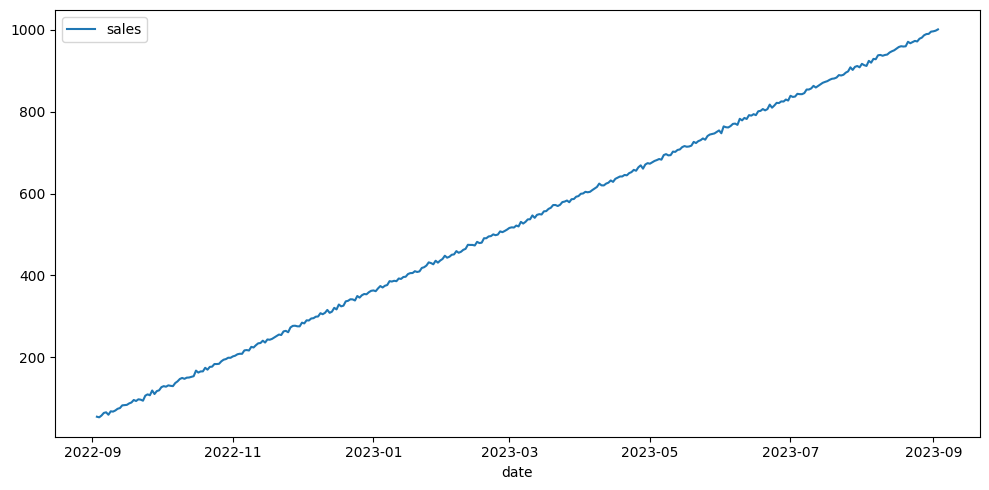

In [8]:
# - Importe De Librerías Para Visualización:

import matplotlib.pyplot as plt
import seaborn as sns

# - Parámetros:

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df, ax=axis)

# - Visualización:

plt.tight_layout()
plt.show()

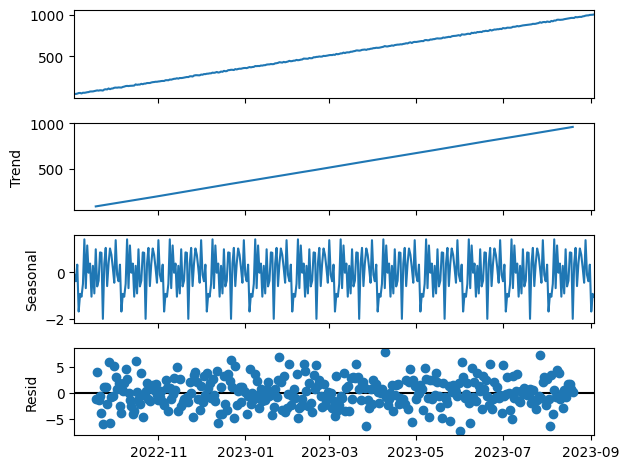

In [9]:
# - Importe Para Análisis De Estacionalidad:

from statsmodels.tsa.seasonal import seasonal_decompose

# - Descomposición Estacional Del DataFrame:

decomposition = seasonal_decompose(df, period=30)

# - Visualización De La Descomposición:

decomposition.plot()
plt.tight_layout()
plt.show()

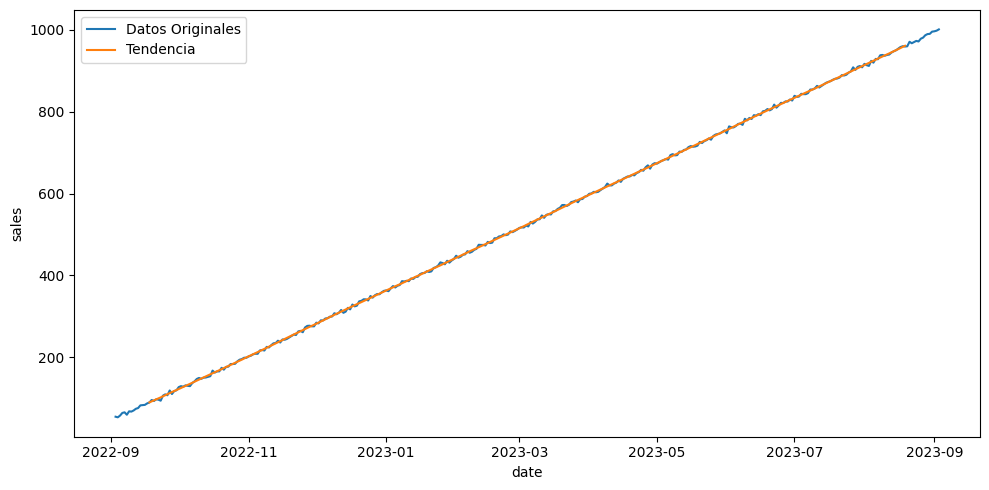

In [11]:
# - Extracción De La Tendencia De La Descomposición:

trend = decomposition.trend

# - Parámetros:

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y=df.iloc[:, 0], ax=axis, label='Datos Originales')
sns.lineplot(x=trend.index, y=trend, ax=axis, label='Tendencia')

# - Visualización:

plt.tight_layout()
plt.show()

In [12]:
# - Importe Para Test De Estacionariedad:

from statsmodels.tsa.stattools import adfuller

# - Función Para Realizar Prueba De Dickey-Fuller:

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput[f"Critical Value ({key})"] = value
    return dfoutput

# - Aplicar Test A La Primera Columna Del DataFrame:

resultado_test = test_stationarity(df.iloc[:, 0])
print(resultado_test)

'''

Interpretación:

    • Si el p-value es mayor a 0.05, la serie es NO estacionaria.

    • En este caso, la serie no es estacionaria, por lo que se pueden aplicar modelos que consideren esta característica, como modelos ARIMA con diferenciación.

'''

Resultados de la prueba de Dickey-Fuller:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


'\n\nInterpretación:\n\n    • Si el p-value es mayor a 0.05, la serie es NO estacionaria.\n\n    • En este caso, la serie no es estacionaria, por lo que se pueden aplicar modelos que consideren esta característica, como modelos ARIMA con diferenciación.\n\n'

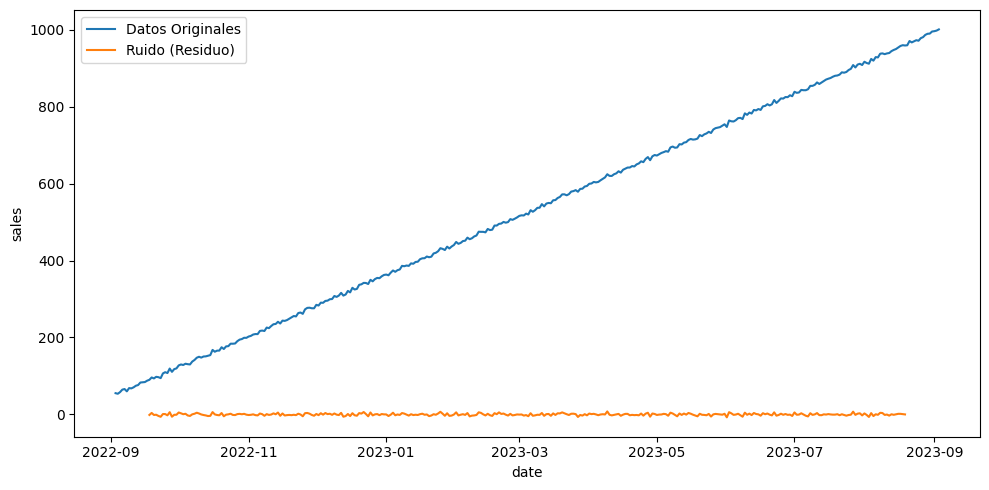

In [14]:
# - Análisis De Variabilidad:

raed = decomposition.resid

# - Parámetros:

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y=df.iloc[:, 0], ax=axis, label='Datos Originales')
sns.lineplot(x=raed.index, y=raed, ax=axis, label='Ruido (Residuo)')

# - Visualización:

plt.tight_layout()
plt.show()

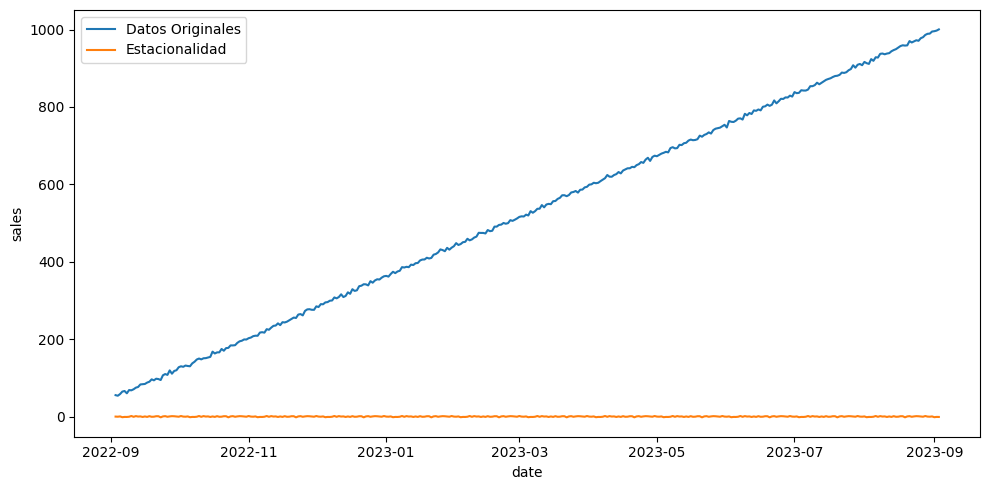

In [15]:
# - Extracción Del Componente Estacional:

seasonal = decomposition.seasonal

# - Parámetros:

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(x=df.index, y=df.iloc[:, 0], ax=axis, label='Datos Originales')
sns.lineplot(x=seasonal.index, y=seasonal, ax=axis, label='Estacionalidad')

# - Visualización:

plt.tight_layout()
plt.show()

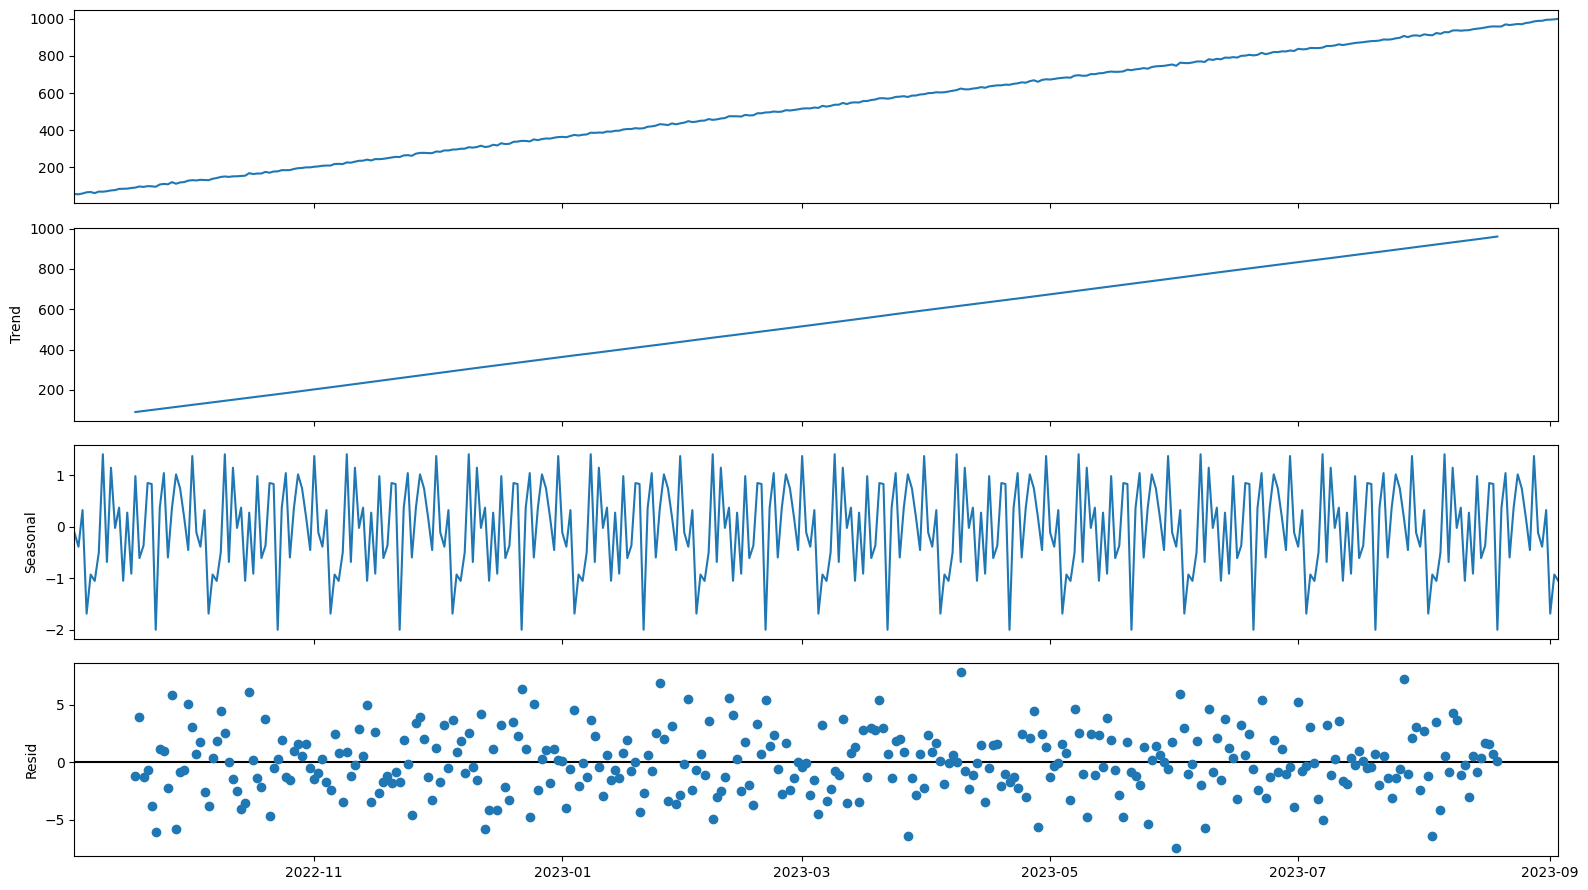

In [16]:
# - Parámetros:

fig = decomposition.plot()
fig.set_size_inches((16, 9))

# - Visualización:

fig.tight_layout()
plt.show()

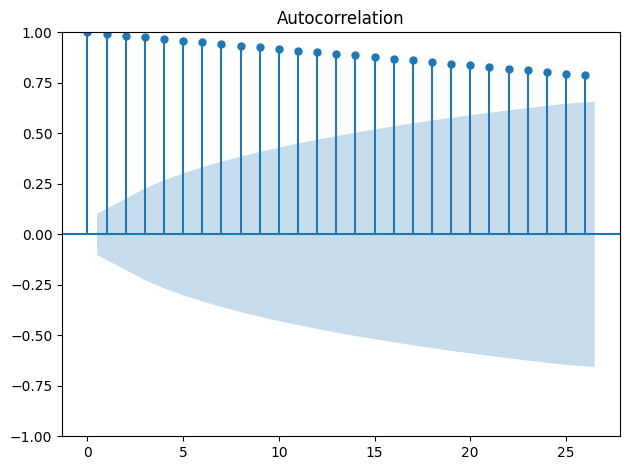

In [18]:
# - Importe Para Visualización De Autocorrelación:

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# - Gráfico De Función De Autocorrelación (ACF):

plot_acf(df.iloc[:, 0])

# - Visualización:

plt.tight_layout()
plt.show()

In [19]:
# - Conversión Del Índice:

df.index = pd.to_datetime(df.index)

# - División Del Dataset En Conjunto De Entrenamiento:

train = df.loc[:'2023-08-03']

# - División Del Dataset En Conjunto De Prueba:

test = df.loc['2023-08-04':]

In [20]:
train

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-07-30,911.145675
2023-07-31,907.940014
2023-08-01,916.429348


In [21]:
test

,sales
date,
2023-08-04,923.736767
2023-08-05,919.252876
2023-08-06,928.476091
2023-08-07,927.673995
2023-08-08,937.307420
2023-08-09,938.137035
2023-08-10,936.174089
2023-08-11,938.073473
2023-08-12,939.097494


In [22]:
from pmdarima import auto_arima

model = auto_arima(train, seasonal = False, trace = True)

d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1694.534, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1923.639, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1811.695, Time=0.09 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1691.374, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2023.851, Time=0.02 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1690.961, Time=0.52 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1692.867, Time=0.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1695.374, Time=0.18 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1690.898, Time=0.21 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1692.880, Time=0.31 sec


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1983.797, Time=0.08 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 4.199 seconds


d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2023-08-04 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  335
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -841.449
Date:                Fri, 30 May 2025   AIC                           1690.898
Time:                        22:15:54   BIC                           1706.143
Sample:                    09-03-2022   HQIC                          1696.976
                         - 08-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5951      0.011    239.847      0.000       2.574       2.616
ma.L1         -1.0289      0.052    -19.943      0.000      -1.130      -0.928
ma.L2          0.0913      0.051      1.779      0.075      -0.009       0.192
sigma2         8.9718      0.733     12.235      0.000       7.535      10.409
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.98   Prob(JB):                         0.70
Heteroskedasticity (H):               0.89   Skew:                             0.08
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mes_predicho = model.predict(62)

d:\Users\luism\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test, mes_predicho[:len(test)])

6.751951601744641

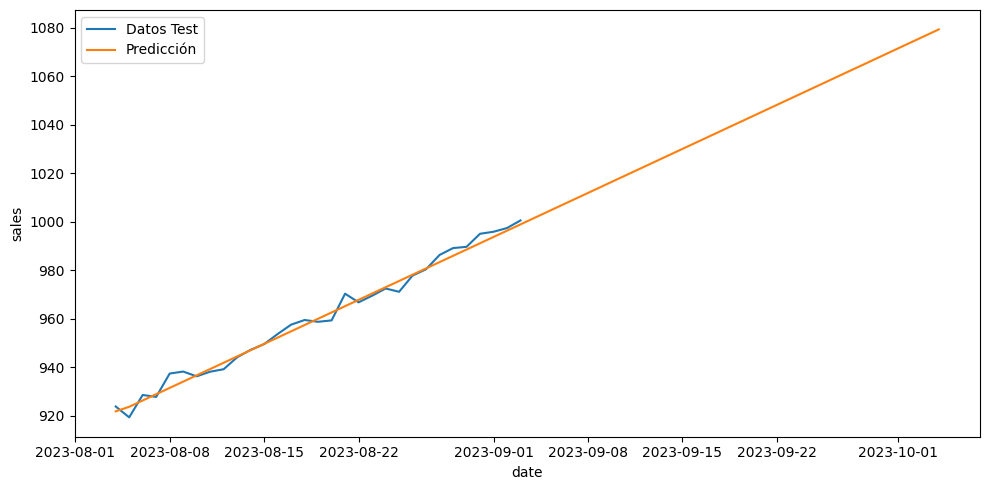

In [28]:
# - Parámetros:

fig, axis = plt.subplots(figsize=(10, 5))
sns.lineplot(x=test.index, y=test.iloc[:, 0], ax=axis, label='Datos Test')
sns.lineplot(x=mes_predicho.index, y=mes_predicho, ax=axis, label='Predicción')

# - Visualización:

plt.tight_layout()
plt.show()

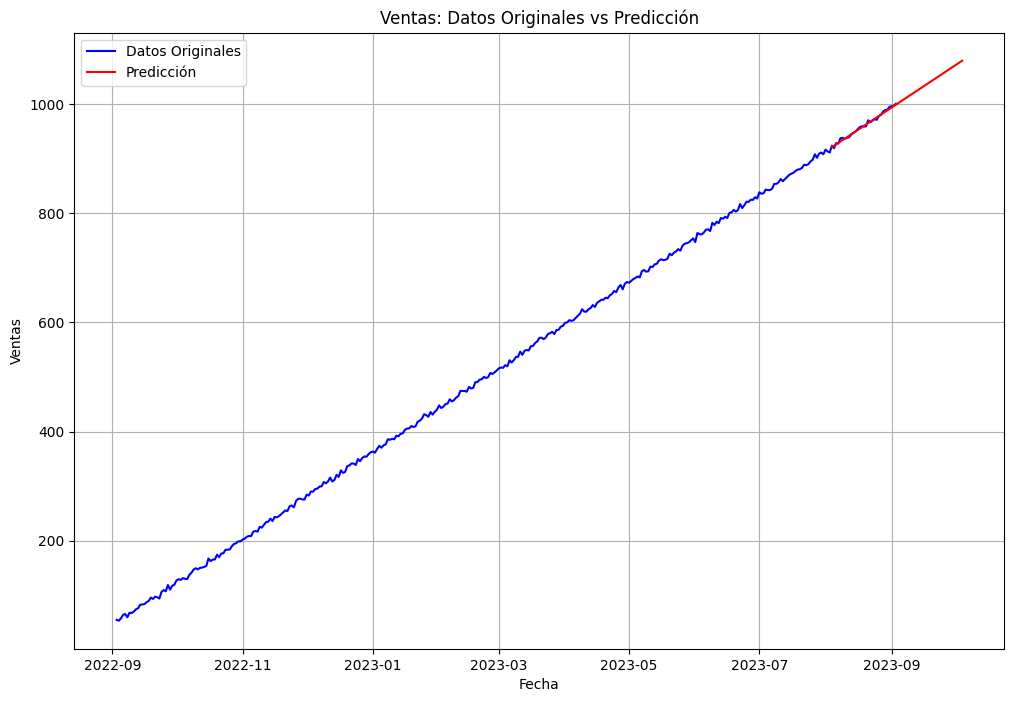

In [29]:
# - Parámetros:

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(df.index, df['sales'], label='Datos Originales', color='blue')
plt.plot(mes_predicho.index, mes_predicho, label='Predicción', color='red')
plt.title('Ventas: Datos Originales vs Predicción')
plt.xlabel('Fecha')
plt.ylabel('Ventas')

# - Visualización:

plt.legend()
plt.grid(True)